# This is the Github Link https://github.com/FaresQaddoumi/ML-fundamentals-2025

# Task 1: ExploratoryDataAnalysis(EDA)

In [15]:

import pandas as pd


df = pd.read_csv('C:/Users/er/Downloads/hour.csv')

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Loaded the dataset `hour.csv`**  
We used `pandas` to load the UCI Bike Sharing dataset, which includes hourly records of bike rentals and related features like time, weather, and user types.  
We also displayed dataset info and the first few rows to understand its structure and check for missing values.


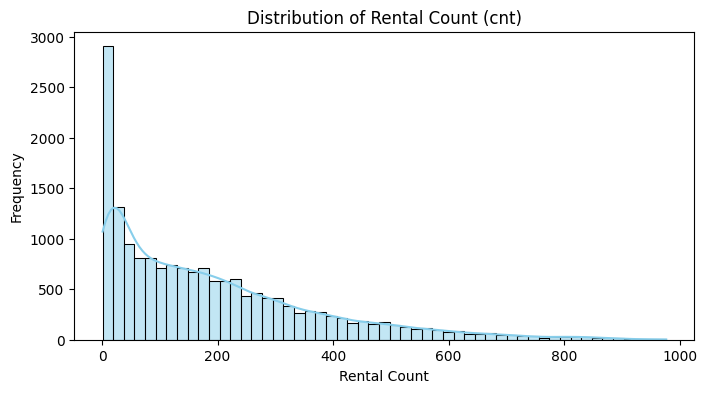

Skewness of cnt: 1.28


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

plt.figure(figsize=(8, 4))
sns.histplot(df['cnt'], kde=True, color='skyblue')
plt.title('Distribution of Rental Count (cnt)')
plt.xlabel('Rental Count')
plt.ylabel('Frequency')
plt.show()

cnt_skewness = skew(df['cnt'])
print(f'Skewness of cnt: {cnt_skewness:.2f}')


 **Explored the distribution of the target variable `cnt`**  
A histogram with a kernel density estimate was plotted to visualize the distribution (smoother distribution for large data).  
We also computed the skewness to measure asymmetry:
- A positive skew means more frequent lower values with a long tail of higher values.
- A negative skew means the opposite of a positive skew.

The distribution here is slightly positively skewed.


In [17]:
temporal_features = ['hr', 'weekday', 'mnth', 'season', 'yr']
binary_features = ['holiday', 'workingday']
weather_features = ['weathersit']


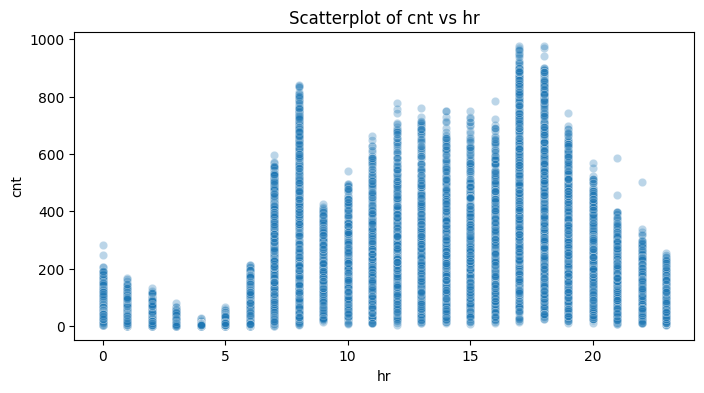

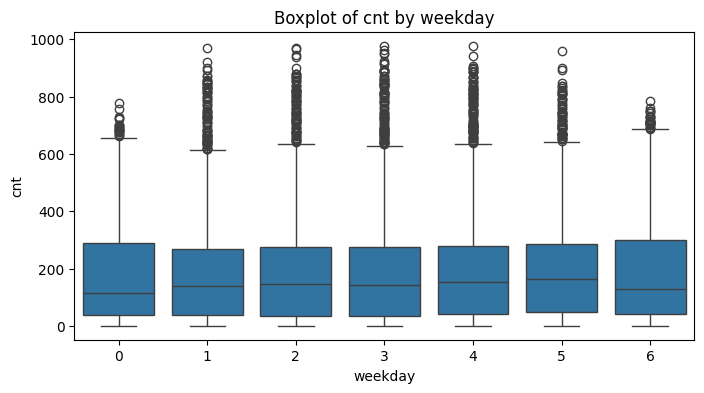

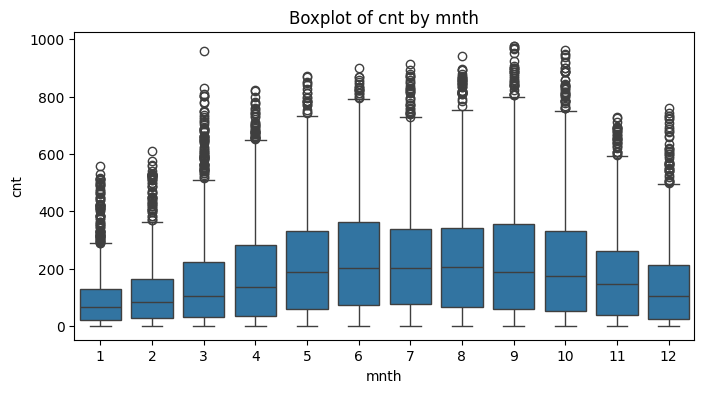

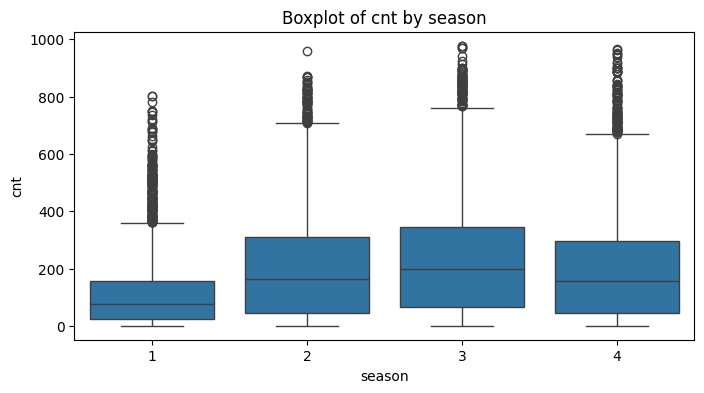

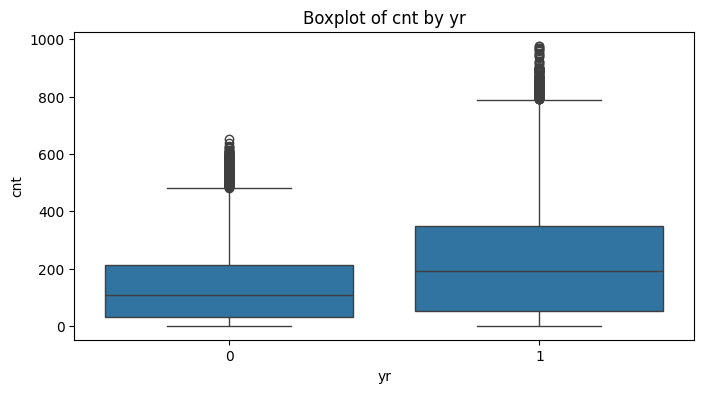

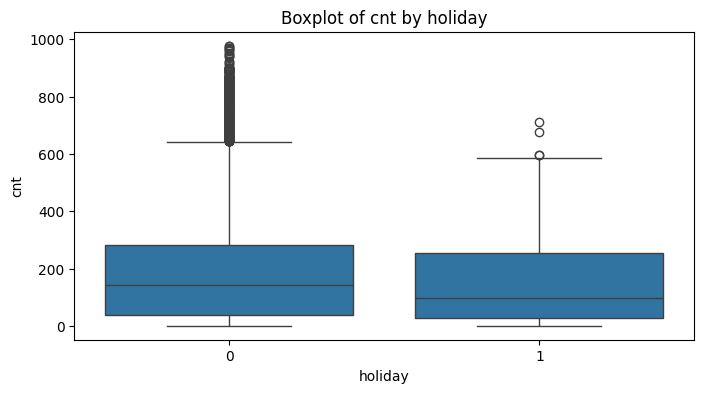

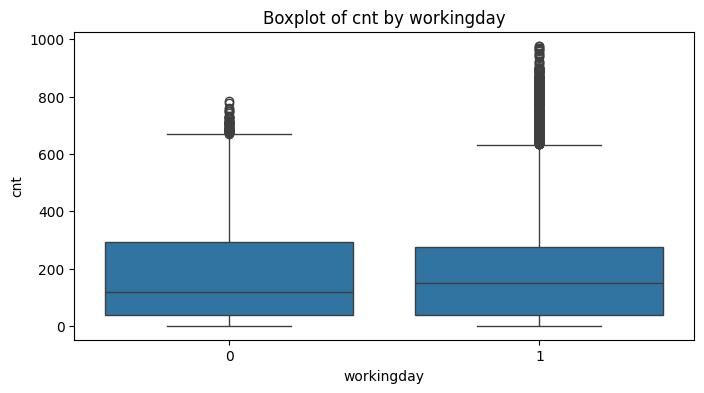

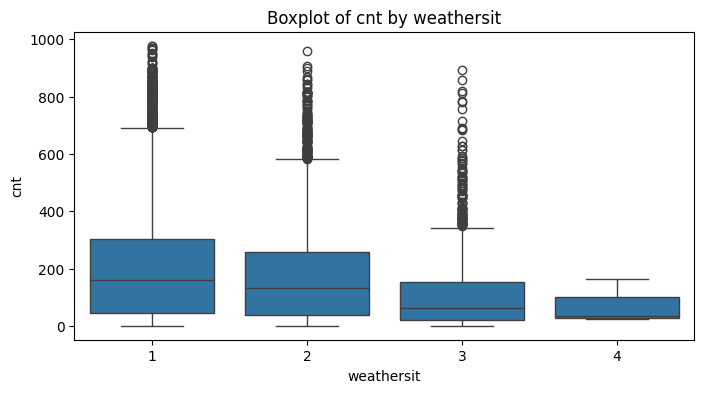

In [18]:
for feature in temporal_features + binary_features + weather_features:
    plt.figure(figsize=(8, 4))
    if df[feature].nunique() < 20:
        sns.boxplot(data=df, x=feature, y='cnt')  # Removed palette
        plt.title(f'Boxplot of cnt by {feature}')
    else:
        sns.scatterplot(data=df, x=feature, y='cnt', alpha=0.3)
        plt.title(f'Scatterplot of cnt vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('cnt')
    plt.show()



**Explored feature influence on `cnt`**
- cnt: Total count of bike rentals in an hour
We analyzed how various feature categories impact the rental count:
- **Temporal features** (hour, day, month, season)
- - People rent more bikes during morning (commute to work) and evening hours (commute home)
- **Binary features** (holiday, working day)
- **Weather features** (temperature, humidity, windspeed, etc.)

We used boxplots for categorical features and scatter plots for continuous ones to understand relationships and patterns.


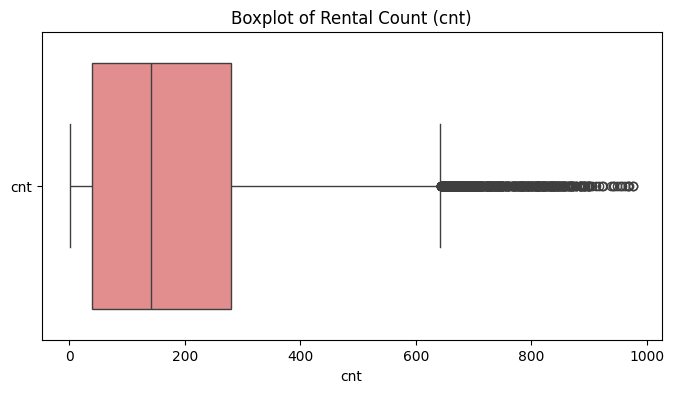

In [19]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[['cnt']], orient='h', color='lightcoral')
plt.title('Boxplot of Rental Count (cnt)')
plt.xlabel('cnt')
plt.show()


**Potential Outliers in 'cnt'**
- This boxplot identifies extreme rental values that might be outliers, which could affect model performance.


In [20]:
df_cleaned = df.drop(columns=['instant', 'dteday', 'casual', 'registered'])
df_cleaned.shape


(17379, 13)

**Cleaning/Removing irrelevant or harmful columns**

-instant is a row id that doesn't add predictive value,dteday since we already parsed data features like math and weather, casual and registeres are component of target cnt, so including them wouls leak information to the model.

# Task 2: Data Splitting

In [21]:

#separate the features and target variable
X = df.drop(columns=['cnt'])  # Features
y = df['cnt']  # Target

**Step 1: Separating Features and Target**

We start by separating the input features (`X`) from the target variable (`y`).
- The `cnt` column represents the number of rentals, which is our prediction target, while all other columns are used as features to make predictions.

In [22]:
from sklearn.model_selection import train_test_split

# First split: 60% training, 40% temporary
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, shuffle=True
)


**Step 2: Train-Test Split (60% Training)**

We split the data into:
- **60% for training** the model.
- **40% is the temporary set**, which we will divide into validation and test sets.

- We put random state so that we can ensure reproducibility, and to ensure random sampling, we use shuffle = True, unless temporal order is critical like a problem of time series.



In [23]:
# Second split: 20% validation, 20% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True
)


**🔹 Step 3: Split into Validation and Test Sets (20% Each)**

We now split the temporary 40% set into:
- **20% for validation** that is used to tune hyperparameters and prevent overfitting.
- **20% for testing** that is used for final evaluation after the model is trained and validated.
Which results with the 60/20/20 split that we wanted to achieve from task 2.

- In the cell below we print the set sizes to see if the distribution is correct and to avoid any future problems.


In [24]:
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 10427
Validation set size: 3476
Test set size: 3476


# Task 3: Feature Engineering

In [25]:
import numpy as np

# Encode 'hr' and 'weekday' as cyclical features using sine and cosine transforms
for df_split in [X_train, X_val, X_test]:
    df_split['hr_sin'] = np.sin(2 * np.pi * df_split['hr'] / 24)
    df_split['hr_cos'] = np.cos(2 * np.pi * df_split['hr'] / 24)
    df_split['weekday_sin'] = np.sin(2 * np.pi * df_split['weekday'] / 7)
    df_split['weekday_cos'] = np.cos(2 * np.pi * df_split['weekday'] / 7)


**Encoded cyclical features: `hr` and `weekday`**

Time-based features like `hr` and `weekday` are cyclical. For example:
- Hour 23 and hour 0 are close, not far apart, but the model sees a gap between them so we need to use cosine and sine.
- Same with Sunday (6) and Monday (0).

We use sine and cosine transforms to preserve this cyclic nature, and to show a smoother pattern. This helps the model understand day and week time patterns more naturally than treating these values as raw integers.


In [26]:
# One hot encode season, weathersit, and mnth (month)
categorical_cols = ['season', 'weathersit', 'mnth']

X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_val = pd.get_dummies(X_val, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Align the columns (in case one-hot encoding created mismatches between sets)
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


**One-hot encoded categorical variables: season, weathersit, and mnth**

We use one hot encoding to represent each category as their designated binary column, since these features do not have a natural order, they are categorical.

We drop the first category with`drop_first=True` to achieve multicollinearity and avoid the dummy variable trap.

After encoding, we re-align the columns of the validation and test sets to ensure they match the training set  which prevents dimension mismatch errors during modeling.


In [27]:
from sklearn.preprocessing import StandardScaler

# Define which features to scale
features_to_scale = ['temp', 'atemp', 'hum', 'windspeed']

# Initialize and fit scaler only on training data
scaler = StandardScaler()
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])

# Transform validation and test sets using the same scaler so we do not do fitting again
X_val[features_to_scale] = scaler.transform(X_val[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])


**Scaled continuous features using StandardScaler**

We apply scaling to normalize the range of numeric features:
- `temp`, `atemp`, `hum`, `windspeed`

**preventing data leakage**
- Fit the StandardScaler only on the training data (`X_train`)
- Then use that same scaler to transform `X_val` and `X_test`

This ensures the model does not learn anything from the validation or test sets during training, which keeps our evaluation accurate and without leakage.


In [29]:
# Drop non-numeric columns (if still present)
cols_to_drop = ['instant', 'dteday', 'casual', 'registered']
for df_split in [X_train, X_val, X_test]:
    for col in cols_to_drop:
        if col in df_split.columns:
            df_split.drop(columns=col, inplace=True)


In [31]:
X_train.select_dtypes(include='object').columns



Index([], dtype='object')

# Task 4: Baseline Model– Linear Regression

In [32]:
# Importing libraries and training the model
from sklearn.linear_model import LinearRegression

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

**Trained a baseline Linear Regression model**

We use LinearRegression to build a simple baseline model.  
This model assumes a linear relationship between features and the target (`cnt`).

Linear regression is a good starting point to check the general trend of data and is a baseline for comparison with complex models like random forest that we will encounter in later tasks.


In [33]:
# Predict on the validation set
y_val_pred = lr_model.predict(X_val)


**Predicting the rental count with the validation set**
- We apply the trained model to the validation data to see how well it generalizes to unseen data
- This will help us in seeing if the model is able to capture the patterns in the data or not. 


In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate the model using standard regression metrics
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Validation MSE: {mse:.2f}")
print(f"Validation MAE: {mae:.2f}")
print(f"Validation R² Score: {r2:.4f}")


Validation MSE: 15614.13
Validation MAE: 91.96
Validation R² Score: 0.5196


**Evaluated model performance on validation set using common metrics**

We use three common regression metrics:
- **MSE(Mean Squared Error)**: Heavily penalizes larger errors
- **MAE(Mean Absolute Error)**: gives an average of all absolute errors
- **R² Score**: measures how well the variance in the target is explained by the model

These metrics allow us to find the model's accuracy and establish a baseline for future models.


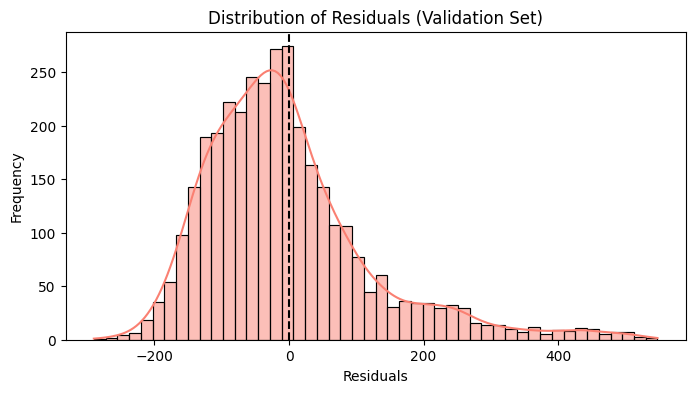

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute residuals
residuals = y_val - y_val_pred

# Plot residuals
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True, color='salmon')
plt.title("Distribution of Residuals (Validation Set)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.axvline(x=0, color='black', linestyle='--')
plt.show()


**Plotting residuals to assess model fit**

Residuals = Actual - Predicted

We plot the residuals to check for:
- **Normality** (are they symmetrically distributed?)
- **Systematic patterns** (any signs of underfitting or structure in the error?)

A good model should have residuals centered around 0 with a roughly symmetric distribution.  
Deviations could suggest model bias or that linear regression is too simple for the patterns in the data.
